In [114]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import imageio

In [115]:
def plot_dynamics(vector_field, x_left, x_right, x_step, y_bot, y_top, y_step):
    x, y = np.meshgrid(np.linspace(x_left, x_right, x_step), np.linspace(y_bot, y_top, y_step))
    Vx, Vy = vector_field(x, y)
    if type(Vx) != object:
            Vx = Vx * np.ones(x.shape, dtype=float)
    if type(Vy) != object:
            Vy = Vy * np.ones(y.shape, dtype=float)
    fig, ax = plt.subplots()
    plt.grid()
    ax.streamplot(x, y, Vx, Vy)
    ax.set_aspect('equal')
    plt.show()    


In [116]:
def V(x, y):
    return np.pi * np.sin(np.pi*x)*np.cos(np.pi*y), -np.pi * np.cos(np.pi*x)*np.sin(np.pi*y)

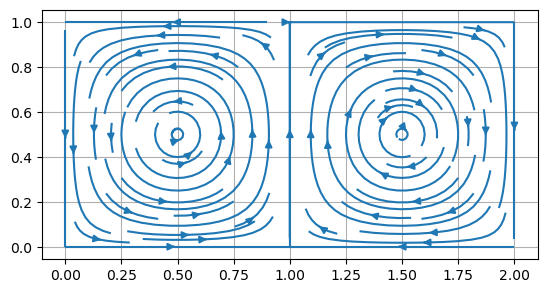

In [117]:
plot_dynamics(V, 0, 2, 100, 0, 1, 100)

In [118]:
def doublegyreVEC(t, yin, A, eps, om):
    x = yin[0]
    y = yin[1]

    u = np.zeros(len(x))
    v = np.zeros(len(y))

    a = eps*np.sin(om*t)
    b = 1 - 2 * a

    f = a * x**2 + b * x
    df = 2 * a * x + b

    u = np.pi * np.sin(np.pi * f) * np.cos(np.pi * y)
    v = - np.pi * np.cos(np.pi * f) * np.sin(np.pi * y) * df

    dy = np.array([u, v])
    return dy
    

In [119]:
A = 0.1
eps = 0.25
omega = 2*np.pi/10 

In [120]:
# Initialize a grid a particles
# and itegrate through vector field
dx = 0.025
x = np.linspace(0, 2, int(2/dx) + 1)
y = np.linspace(0, 1, int(1/dx) + 1)
x0, y0 = np.meshgrid(x, y) # grid of particles

In [121]:
yIC = np.array([x0, y0])

In [122]:
def plot_stream_and_particles(yIC, dy,time,i, ax, fig):
    ax[0].clear()
    ax[1].clear()
    display.clear_output(wait=True)
    ax[0].set_title("time={:.2f}".format(time))
    ax[0].quiver(yIC[0][::10], yIC[1][::10], dy[0][::10], dy[1][::10], color="green")
    ax[1].plot(yIC[0], yIC[1], "or", ms=0.5)
    fig.savefig(".\imgs\\" + "{}".format(i))
    display.display(fig)
    
    

In [123]:
def runge_kutta4_step(yk, f, tk,dt):
    f1 = f(tk, yk)
    f2 = f(tk + dt / 2, yk + dt / 2 * f1)
    f3 = f(tk + dt / 2, yk + dt / 2 * f2)
    f4 = f(tk + dt, yk + dt * f3)
    return yk + dt/6 * (f1 + 2 * f2 + 2 * f3 + f4)

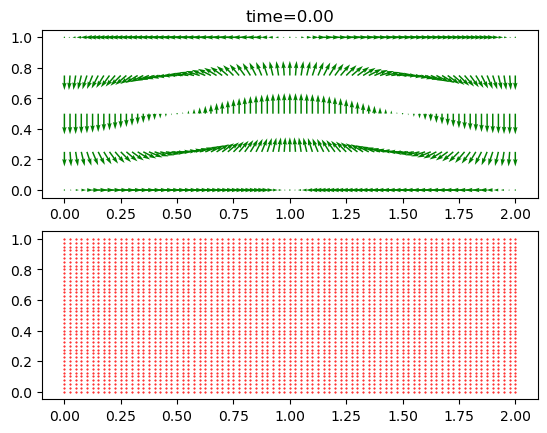

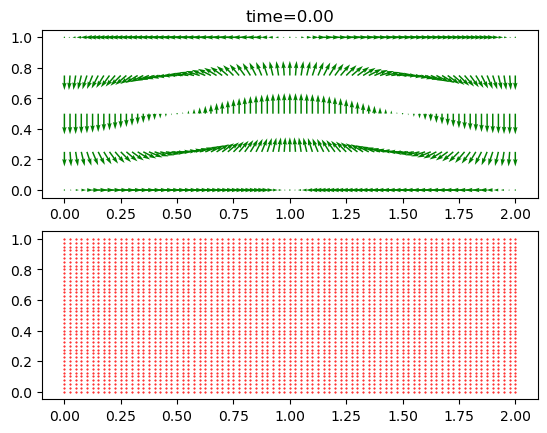

In [124]:
fig, ax = plt.subplots(2)
yin = yIC
dy = doublegyreVEC(0, yin, A, eps, omega)
plot_stream_and_particles(yin, dy, 0, 0 ,ax, fig)

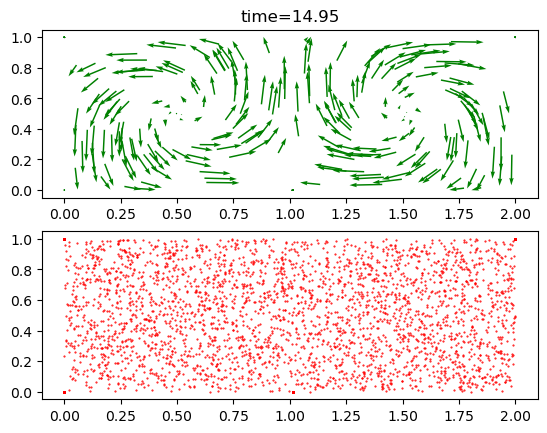

In [125]:
# Part 2 - compute trajectories (i.e. integration)
dt = 0.05 # timestep
T = 15 # duration of integration
for i in range(int(T/dt)):
    time = i*dt
    # integration
    dy = doublegyreVEC(time, yin, A, eps, omega)
    yout = runge_kutta4_step(yin, lambda t, y: doublegyreVEC(t, y, A, eps, omega), time, dt)
    print(yout.shape, yin.shape)
    yin = yout
    # plot
    plot_stream_and_particles(yin, dy, time,i, ax, fig)

In [126]:
import re

def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

In [130]:
from os import listdir
from os.path import isfile, join
filenames = ['.\imgs\\' + f for f in listdir(".\imgs") if isfile(join(".\imgs", f))]


In [131]:
filenames = natural_sort(filenames)
filenames

['.\\imgs\\0.png',
 '.\\imgs\\1.png',
 '.\\imgs\\2.png',
 '.\\imgs\\3.png',
 '.\\imgs\\4.png',
 '.\\imgs\\5.png',
 '.\\imgs\\6.png',
 '.\\imgs\\7.png',
 '.\\imgs\\8.png',
 '.\\imgs\\9.png',
 '.\\imgs\\10.png',
 '.\\imgs\\11.png',
 '.\\imgs\\12.png',
 '.\\imgs\\13.png',
 '.\\imgs\\14.png',
 '.\\imgs\\15.png',
 '.\\imgs\\16.png',
 '.\\imgs\\17.png',
 '.\\imgs\\18.png',
 '.\\imgs\\19.png',
 '.\\imgs\\20.png',
 '.\\imgs\\21.png',
 '.\\imgs\\22.png',
 '.\\imgs\\23.png',
 '.\\imgs\\24.png',
 '.\\imgs\\25.png',
 '.\\imgs\\26.png',
 '.\\imgs\\27.png',
 '.\\imgs\\28.png',
 '.\\imgs\\29.png',
 '.\\imgs\\30.png',
 '.\\imgs\\31.png',
 '.\\imgs\\32.png',
 '.\\imgs\\33.png',
 '.\\imgs\\34.png',
 '.\\imgs\\35.png',
 '.\\imgs\\36.png',
 '.\\imgs\\37.png',
 '.\\imgs\\38.png',
 '.\\imgs\\39.png',
 '.\\imgs\\40.png',
 '.\\imgs\\41.png',
 '.\\imgs\\42.png',
 '.\\imgs\\43.png',
 '.\\imgs\\44.png',
 '.\\imgs\\45.png',
 '.\\imgs\\46.png',
 '.\\imgs\\47.png',
 '.\\imgs\\48.png',
 '.\\imgs\\49.png',
 '.\\imgs\

In [132]:
filenames
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('ode_for_particle_trajectoriies.gif', images)

C:\Temp\ipykernel_1364\660524220.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
